ATIVIDADE 5: Apriori Escolha uma base de dados no https://www.kaggle.com/datasets, e se familiarize com sua base Procure realizar a identificação de regras de negócio com Apriori. Identifique regras que concluem uma variável categoria, utilize esta como label e execute uma Árvore de Decisão, compare as regras da árvore com do apriori. Não esqueça de junto com seus códigos realizar suas análises/conclusões (use o botão de +Texto).

In [4]:
# Importar bibliotecas
import pandas as pd

# Carregar o dataset
basket_data = pd.read_csv('./basket_analysis.csv')
basket_data


,Unnamed: 0,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,994,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True
995,995,True,False,False,False,True,False,False,False,True,True,True,False,False,False,True,False
996,996,True,False,False,False,True,True,False,False,False,False,False,False,True,False,False,True
997,997,False,False,True,True,True,False,True,True,True,False,True,False,True,False,True,True


In [5]:
# Remover a coluna 'Unnamed: 0' que é irrelevante
basket_data_clean = basket_data.drop(columns=['Unnamed: 0'])

# Exibir as primeiras linhas do dataset para verificar
basket_data_clean.head(5)

,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [35]:
# Importar o algoritmo Apriori e a função para regras de associação
from mlxtend.frequent_patterns import apriori, association_rules

# Aplicar o algoritmo Apriori
frequent_itemsets = apriori(basket_data_clean, min_support=0.1, use_colnames=True)

# Gerar regras de associação
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)

# Exibir as primeiras regras
rules.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bread),(Apple),0.384384,0.383383,0.154154,0.401042,1.046059,0.006788,1.029482,0.071524
1,(Apple),(Bread),0.383383,0.384384,0.154154,0.402089,1.046059,0.006788,1.029610,0.071407
2,(Butter),(Apple),0.420420,0.383383,0.188188,0.447619,1.167549,0.027006,1.116289,0.247602
3,(Apple),(Butter),0.383383,0.420420,0.188188,0.490862,1.167549,0.027006,1.138354,0.232730
4,(Cheese),(Apple),0.404404,0.383383,0.162162,0.400990,1.045925,0.007120,1.029393,0.073721


In [36]:
from sklearn.model_selection import train_test_split

# Definir 'Milk' como a variável alvo (label)
X = basket_data_clean.drop(columns=['Milk'])
y = basket_data_clean['Milk']

# Separar em conjunto de treino e teste (70% treino e 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificar o formato dos dados
X_train.shape, X_test.shape


((699, 15), (300, 15))

In [53]:
# Importar a Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Criar e treinar o modelo de Árvore de Decisão
clf = DecisionTreeClassifier(random_state=42, max_depth=2)
clf.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = clf.predict(X_test)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.4f}")

# Exibir o relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))


Acurácia: 0.6200
Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.63      0.85      0.72       176
        True       0.58      0.29      0.39       124

    accuracy                           0.62       300
   macro avg       0.61      0.57      0.56       300
weighted avg       0.61      0.62      0.59       300



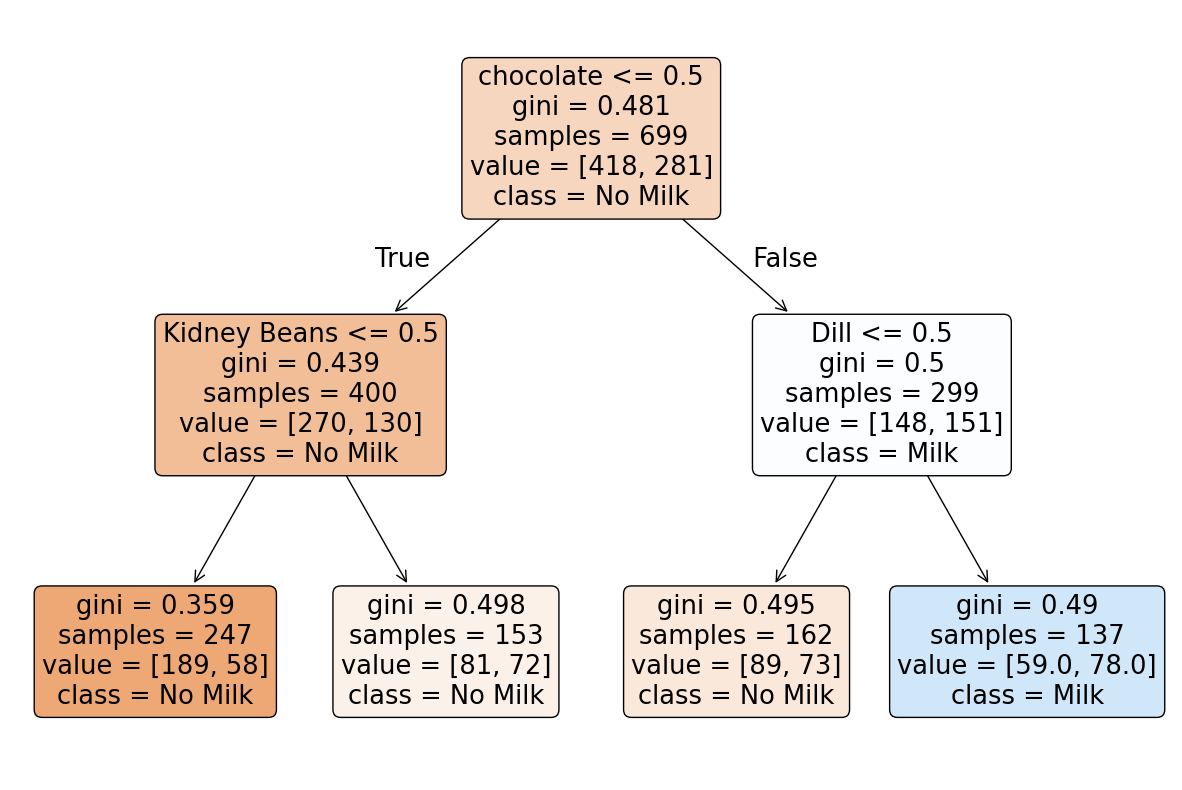

In [54]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
tree.plot_tree(clf, feature_names=X.columns, class_names=["No Milk", "Milk"], filled=True, rounded=True)
plt.show()
